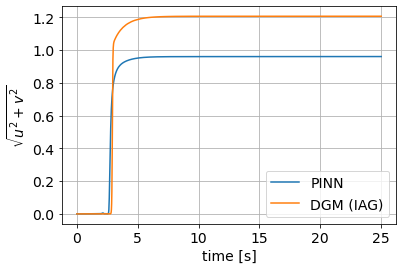

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data1_Re50_1  = pd.read_csv("data_for_x=[1.0,0.5]_50_1000_50.csv",header=None,index_col=0)
data1_Re50_2  = pd.read_csv("data_for_x=[2.0,0.2]_50_1000_50.csv",header=None,index_col=0)
data1_Re200_1 = pd.read_csv("data_for_x=[1.0,0.5]_200_x_x_1.csv",header=None,index_col=0)
data1_Re200_2 = pd.read_csv("data_for_x=[2.0,0.2]_200_x_x_2.csv",header=None,index_col=0)
data1_Re500_1 = pd.read_csv("data_for_x=[1.0,0.5].csv",header=None,index_col=0)
data1_Re500_2 = pd.read_csv("data_for_x=[1.0,0.5].csv",header=None,index_col=0)

data1 = data1_Re200_1
data1.index.name = 'Time'
data1.columns.name = 'u_PINN'


data2_Re50_1  = pd.read_csv("Burger_IAG/Re50_baseline_RecordPoints_1_05.csv")
data2_Re50_2  = pd.read_csv("Burger_IAG/Re50_baseline_RecordPoints_2_02.csv")
#
data2_Re200_1 = pd.read_csv("Burger_IAG/Re200_baseline_RecordPoints_1_05.csv")
data2_Re200_2 = pd.read_csv("Burger_IAG/Re200_baseline_RecordPoints_2_02.csv")
#
data2_Re500_1 = pd.read_csv("Burger_IAG/Re50_baseline_RecordPoints_1_05.csv")
data2_Re500_2 = pd.read_csv("Burger_IAG/Re50_baseline_RecordPoints_2_02.csv")

data2 = data2_Re200_1

data2 = data2.set_index("Time")
data1_inter = pd.DataFrame(np.interp(data2.index,data1.index,data1.to_numpy().flatten()),
                           index = data2.index,columns=data1.columns)
data = pd.concat((data1_inter,data2['u']),axis=1)
data.columns = ['PINN','DGM (IAG)']
data.plot(grid=True)

fontsize = 14
plt.rc('font', size=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.savefig('B_200_7_50_2.png', dpi=300)
plt.xlabel('time [s]')
plt.ylabel('$\sqrt{u^2+v^2}$')
plt.show()

